In [1]:
from IPython.core.display import HTML

# Introduction to MongoDB with PyMongo and NOAA Data

This notebook provides a basic walkthrough of how to use MongoDB and is based on a tutorial originally by [Alberto Negron](http://altons.github.io/python/2013/01/21/gentle-introduction-to-mongodb-using-pymongo/).

## What is MongoDB?
MongoDB is a cross-platform document-oriented NoSQL database. Rather than the traditional table-based relational database structure, MongoDB stores JSON-like documents with dynamic schemas (called BSON), making data integration easier and faster for certain types of applications.

## Features
Some of the features include:    

__Document-orientation__
Instead of taking a business subject and breaking it up into multiple relational structures, MongoDB can store the business subject in the minimal number of documents.    

__Ad hoc queries__
MongoDB supports field, range queries, regular expression searches. Queries can return specific fields of documents and also include user-defined JavaScript functions.    

__Indexing__
Any field in a MongoDB document can be indexed – including within arrays and embedded documents. Primary and secondary indices are available.    

__Aggregation__
Aggregation operators can be strung together to form a pipeline – analogous to Unix pipes.    


## When it makes sense to use MongoDB    
Metadata records are frequently stored as JSON, and almost anything you get from an API will be JSON. For example, check out the [metadata records](https://data.noaa.gov/data.json) for the National Oceanic and Atmospheric Administration. 

MongoDB is a great tool to use with JSON data because it stores structured data as JSON-like documents, using dynamic rather than predefined schemas. 

In MongoDB, an element of data is called a document, and documents are stored in collections. One collection may have any number of documents. Collections are a bit like tables in a relational database, and documents are like records. But there is one big difference: every record in a table has the same fields (with, usually, differing values) in the same order, while each document in a collection can have completely different fields from the other documents.

Documents are Python dictionaries that can have strings as keys and can contain various primitive types (int, float,unicode, datetime) as well as other documents (Python dicts) and arrays (Python lists).

## Getting started
First we need to import `json` and `pymongo`.

Note that the `pprint` module provides a capability to “pretty-print” arbitrary Python data structures in a form which can be used as input to the interpreter. This is particularly helpful with JSON. You can read more about `pprint` [here](https://docs.python.org/2/library/pprint.html).

In [2]:
import json
import pymongo
from pprint import pprint

## Connect    
Just as with the relational database example with `sqlite`, we need to begin by setting up a connection. With MongoDB, we will be using `pymongo`, though MongoDB also comes with a [console API that uses Javascript](https://docs.mongodb.org/manual/tutorial/write-scripts-for-the-mongo-shell/).    

Make sure you have launched Mongo on your system before you connect.
OS X - mongod
Windows - net start MongoDB

To make our connection, we will use the PyMongo method `MongoClient`:

In [3]:
conn = pymongo.MongoClient()

The above code will connect on the default local host and port.

We can also specify the host and port explicitly, as follows:

* `conn = pymongo.MongoClient('localhost', 27017)`

Or by using the MongoDB URI:

* `conn = pymongo.MongoClient('mongodb://localhost:27017/')`

In [4]:
# Check to see whether you're connected to MongoDB:
conn

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

## Create and access a database    

MongoDB creates databases and collections automatically for you if they don't exist already. A single instance of MongoDB can support multiple independent databases. When working with PyMongo, we access databases using attribute style access, just like we did with `sqlite`:

In [5]:
db = conn.mydb

In [6]:
# Check to see whether you're connected to the 'mydb' database in MongoDB:
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'mydb')

If your connection fails, verify your Mongo server is running.

In [7]:
# View databases:
conn.list_database_names()

['admin', 'config', 'local']

Note that 'mydb' does not appear in the list yet.

## Collections    
A collection is a group of documents stored in MongoDB, and can be thought of as roughly the equivalent of a table in a relational database. Getting a collection in PyMongo works the same as getting a database:

In [8]:
collection = db.my_collection

In [9]:
db.list_collection_names()

[]

## Insert data   
To insert some data into MongoDB, all we need to do is create a dict and call `insert_one` on the collection object:

In [10]:
doc = {"class":"xbus-502","date":"03-05-2016","instructor":"bengfort","classroom":"C222","roster_count":"25"}
collection.insert_one(doc)

You can put _anything_ in:

In [11]:
doc = {"class":"xbus-502","date":"03-05-2016","teaching_assistant":"bilbro", "sauce": "awesome"}
collection.insert_one(doc)

In [12]:
doc = {"class":"xbus-502","date":"09-21-2019","teaching_assistant":"navarrete", "sauce": "also awesome"}
collection.insert_one(doc)

## View listings

Now that we've populated our collection, '`my_collection`' will appear in the list of collection names:

In [13]:
db.list_collection_names()

['my_collection']

And '`mydb`' appears in the list of database names:

In [14]:
conn.list_database_names()

['admin', 'config', 'local', 'mydb']

## Print our documents

Using Python's default print:

In [15]:
see_collection = collection.find({})

for document in see_collection:
    print(document)

{'_id': ObjectId('5d814911a20ce1b8b05c039c'), 'class': 'xbus-502', 'date': '03-05-2016', 'instructor': 'bengfort', 'classroom': 'C222', 'roster_count': '25'}
{'_id': ObjectId('5d814911a20ce1b8b05c039d'), 'class': 'xbus-502', 'date': '03-05-2016', 'teaching_assistant': 'bilbro', 'sauce': 'awesome'}
{'_id': ObjectId('5d814911a20ce1b8b05c039e'), 'class': 'xbus-502', 'date': '09-21-2019', 'teaching_assistant': 'navarrete', 'sauce': 'also awesome'}


Using pretty print (`pprint`):

In [16]:
see_collection = collection.find({})

for document in see_collection:
    pprint(document)

{'_id': ObjectId('5d814911a20ce1b8b05c039c'),
 'class': 'xbus-502',
 'classroom': 'C222',
 'date': '03-05-2016',
 'instructor': 'bengfort',
 'roster_count': '25'}
{'_id': ObjectId('5d814911a20ce1b8b05c039d'),
 'class': 'xbus-502',
 'date': '03-05-2016',
 'sauce': 'awesome',
 'teaching_assistant': 'bilbro'}
{'_id': ObjectId('5d814911a20ce1b8b05c039e'),
 'class': 'xbus-502',
 'date': '09-21-2019',
 'sauce': 'also awesome',
 'teaching_assistant': 'navarrete'}


## A practical example

Rebecca Bilbro, former teaching assistant and current instructor, has created this practical example for us to work through: 

At my job I have been working on a project to [help make Commerce datasets easier to find](https://github.com/CommerceDataService/recordtagger). One of the barriers to searching for records is when the keywords return either too many or too few results. It can also be a problem if the keywords are too technical for lay users. 

One solution is to use topic modeling to extract latent themes from the metadata records and then probabilistically assign each record a more sensical set of keywords based on its proximity (via kmeans) to the topics.

In order to get started, first I had to gather up a bunch of JSON metadata records and store them for analysis and modeling. Here's what I did: 

```python
import requests

NOAA_URL = "https://data.noaa.gov/data.json"

def load_data(URL):
    """
    Loads the data from URL and returns data in JSON format.
    """
    r = requests.get(URL)
    data = r.json()
    return data
    
noaa = load_data(NOAA_URL)
```

But...this kinda takes a long time, so I've created a file for you that contains a small chunk of the records to use for today's workshop.

In [17]:
with open("data_sample.json") as data_file:    
    noaa = json.load(data_file)

In [18]:
len(noaa)

1722

### Checking out the data
Now let's print out just one record to examine the structure. 

In [19]:
pprint(noaa[0])

{'@type': 'dcat:Dataset',
 'accessLevel': 'public',
 'accrualPeriodicity': 'irregular',
 'bureauCode': ['006:48'],
 'contactPoint': {'@type': 'vcard:Contact',
                  'fn': 'Ilya P. Romanov',
                  'hasEmail': 'mailto:nsidc@nsidc.org'},
 'description': 'This data set contains sea ice and snow measurements '
                'collected during aircraft landings associated with the Soviet '
                "Union's historical Sever airborne and North Pole drifting "
                'station programs. The High-Latitude Airborne Annual '
                'Expeditions Sever (Sever means North) took place in 1937, '
                '1941, 1948-1952, and 1954-1993 (Konstantinov and Grachev, '
                '2000). In Spring 1993, the last (45th) Sever expedition '
                'finished long-term activity in the Arctic. Snow and sea ice '
                'data were collected, along with meteorological and '
                'hydrological measurements (the latter are not

Or say we wanted just the "description" field:

In [20]:
pprint(noaa[0]['description'])

('This data set contains sea ice and snow measurements collected during '
 "aircraft landings associated with the Soviet Union's historical Sever "
 'airborne and North Pole drifting station programs. The High-Latitude '
 'Airborne Annual Expeditions Sever (Sever means North) took place in 1937, '
 '1941, 1948-1952, and 1954-1993 (Konstantinov and Grachev, 2000). In Spring '
 '1993, the last (45th) Sever expedition finished long-term activity in the '
 'Arctic. Snow and sea ice data were collected, along with meteorological and '
 'hydrological measurements (the latter are not part of this data set). Up to '
 '202 landings were accomplished each year.  The data set contains '
 'measurements of 23 parameters, including ice thickness and snow depth on the '
 'runway and surrounding area; ridge, hummock, and sastrugi dimensions and '
 'areal coverage; and snow density. The sea ice thickness data are of '
 'particular importance, as ice thickness measurements for the Arctic Basin '
 'are s

### Define the database
We will want to enter these records into our database. But first, we'll define a specific database for the NOAA records:

In [21]:
conn = pymongo.MongoClient()
db = conn.earthwindfire

In [22]:
conn.list_database_names()

['admin', 'config', 'local', 'mydb']

### Define the collection
Next we define the collection where we'll insert the NOAA metadata records:

In [23]:
records = db.records

In [24]:
db.list_collection_names()

[]

### Insert data    
Then we loop through each record in the NOAA dataset and insert just the target information for each into the collection.

In [25]:
# What data fields seem important to you? Add them below following the examples:

def insert(metadata):
    for dataset in metadata:
        data ={}
        data["title"] = dataset["title"]
        data["description"] = dataset["description"]
        data["keywords"] = dataset["keyword"]
        data["accessLevel"] = dataset["accessLevel"]
        data["lang"] = dataset["language"]
        # choose your own
        # choose your own
        # choose your own 
        # choose your own

        records.insert_one(data)

insert(noaa)

In [26]:
# Check to make sure they're all in there
records.estimated_document_count()

1722

## View listings
As with before, the listings are now updated:

In [27]:
conn.list_database_names()

['admin', 'config', 'earthwindfire', 'local', 'mydb']

In [28]:
db.list_collection_names()

['records']

### Querying 

#### Querying with `.findOne( )`    
The find_one() method selects and returns a single document from a collection and returns that document (or None if there are no matches). It is useful when you know there is only one matching document, or are only interested in the first match

In [29]:
records.find_one()

{'_id': ObjectId('5d814912a20ce1b8b05c03a0'),
 'title': 'Morphometric Characteristics of Ice and Snow in the Arctic Basin: Aircraft Landing Observations from the Former Soviet Union, 1928-1989',
 'description': "This data set contains sea ice and snow measurements collected during aircraft landings associated with the Soviet Union's historical Sever airborne and North Pole drifting station programs. The High-Latitude Airborne Annual Expeditions Sever (Sever means North) took place in 1937, 1941, 1948-1952, and 1954-1993 (Konstantinov and Grachev, 2000). In Spring 1993, the last (45th) Sever expedition finished long-term activity in the Arctic. Snow and sea ice data were collected, along with meteorological and hydrological measurements (the latter are not part of this data set). Up to 202 landings were accomplished each year.  The data set contains measurements of 23 parameters, including ice thickness and snow depth on the runway and surrounding area; ridge, hummock, and sastrugi dime

#### Querying with `.find( )`
To get more than a single document as the result of a query we use the `find()` method. `find()` returns a Cursor instance, which allows us to iterate over all matching documents.

```python
records.find()
```

For example, we can iterate over the first 2 documents (there are a lot in the collection and this is just an example) in the records collection

In [30]:
for rec in records.find()[:2]:
    pprint(rec)

{'_id': ObjectId('5d814912a20ce1b8b05c03a0'),
 'accessLevel': 'public',
 'description': 'This data set contains sea ice and snow measurements '
                'collected during aircraft landings associated with the Soviet '
                "Union's historical Sever airborne and North Pole drifting "
                'station programs. The High-Latitude Airborne Annual '
                'Expeditions Sever (Sever means North) took place in 1937, '
                '1941, 1948-1952, and 1954-1993 (Konstantinov and Grachev, '
                '2000). In Spring 1993, the last (45th) Sever expedition '
                'finished long-term activity in the Arctic. Snow and sea ice '
                'data were collected, along with meteorological and '
                'hydrological measurements (the latter are not part of this '
                'data set). Up to 202 landings were accomplished each year.  '
                'The data set contains measurements of 23 parameters, '
                'inc

#### Searching 
MongoDB queries are represented as JSON-like structures just like documents. To build a query, you just need to specify a dictionary with the properties you want the results to match. For example, let's say we were just interested in publically available satellite data from [NESDIS](http://www.nesdis.noaa.gov/).

This query will match all documents in the records collection with keywords code "NESDIS".

In [31]:
records.find({"keywords": "NESDIS"}).count()

c:\users\danie\anaconda3\envs\gtown\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


1117

1117 is probably more than we want to print out in a Jupyter Notebook...    

We can further narrow our search by adding additional fields

In [32]:
records.find({"keywords": "NESDIS","keywords": "Russia","accessLevel":"public"}).count()

c:\users\danie\anaconda3\envs\gtown\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


2

Since there's only two, let's check them out:

In [33]:
for r in records.find({"keywords": "NESDIS","keywords": "Russia","accessLevel":"public"}):
    pprint(r)

{'_id': ObjectId('5d814912a20ce1b8b05c03a1'),
 'accessLevel': 'public',
 'description': 'This data set was distributed by NSIDC until October, 2003, '
                'when it was withdrawn from distribution because it duplicates '
                'the NOAA National Climatic Data Center (NCDC) data set '
                'DSI-3720. The NCDC data set is revised and updated beyond '
                'what was distributed by NSIDC. This archive consists of '
                'monthly precipitation measurements from 622 stations located '
                'in the Former Soviet Union.',
 'keywords': ['Continent > Europe > Eastern Europe > Russia',
              'EARTH SCIENCE > Atmosphere > Precipitation > Precipitation '
              'Amount',
              'EARTH SCIENCE > Atmosphere > Precipitation > Precipitation Rate',
              'EARTH SCIENCE > Atmosphere > Precipitation > Rain',
              'EARTH SCIENCE > Atmosphere > Precipitation > Snow',
              'EARTH SCIENCE > Terrest

### If you already know SQL...

The following table provides an overview of common SQL aggregation terms, functions, and concepts and the corresponding MongoDB aggregation operators:    
    
| SQL Terms, Functions, and Concepts  | MongoDB Aggregation Operators  |
| ----------------------------------  |:-------------------------------|
| WHERE                               | \$match                        |
| GROUP BY                            | \$group                        |
| HAVING                              | \$match                        |
| SELECT	                          | \$project                      |
| ORDER BY	                          | \$sort                         |
| LIMIT                               | \$limit                        |
| SUM()   	                          | \$sum                          |
| COUNT()	                          | \$sum                          |
| join	                              | \$lookup                       |

But...thanks to MongoDB's nested data structures, we can also do a lot of things we can't do in a relational database. 

### Length    
Let's look for some entries that have way too many keywords:

In [34]:
cursor = db.records.find({"$where": "this.keywords.length > 100"}).limit(2);
for rec in cursor:
    pprint(rec)

{'_id': ObjectId('5d814912a20ce1b8b05c03e1'),
 'accessLevel': 'public',
 'description': 'The data contain raw and processed values concerning wave '
                'size and direction, energy spectral data (both original and '
                'processed), and, where available, sea surface temperature, '
                'air temperature and pressure, wind speed and direction. The '
                'data are collected in real-time and transmitted to CDIP at '
                'SIO, La Jolla, CA, where it is processed and submitted to '
                'quality control procedures.',
 'keywords': ['DOC/NOAA/NESDIS/NODC > National Oceanographic Data Center',
              'NESDIS',
              'NOAA',
              'U.S. Department of Commerce',
              'DOC/NOAA/NESDIS/NCEI > National Centers for Environmental '
              'Information',
              'NESDIS',
              'NOAA',
              'U.S. Department of Commerce',
              'oceanography',
              'Datawel

### Full text search with a text index
One of the things that makes MongoDB special is that it enables us to create search indexes. Indexes provide high performance read operations for frequently used queries.

In particular, a __text index__ will enable us to search for string content in a collection. _Keep in mind that a collection can have at most one text index._ 

We will create a text index on the description field so that we can search inside our NOAA records text:

In [35]:
db.records.create_index([('description', 'text')])

'description_text'

To test our newly created text index on the description field, we will search documents using the `$text` operator. Let's start by looking for all the documents that have the word 'precipitation' in their description field. 

In [36]:
cursor = db.records.find({'$text': {'$search': 'precipitation'}})
for rec in cursor:
    print(rec)

{'_id': ObjectId('5d814912a20ce1b8b05c03a7'), 'title': 'Monthly Mean Precipitation Sums at Russian Arctic Stations, 1966-1990', 'description': 'This data set contains monthly mean precipitation sums from Russian arctic stations. Precipitation measurements were acquired using a Tretyakov precipitation gauge. Data have not been adjusted for wind bias. Data from 1967 and later are corrected for wetting loss (this correction was made by observers as they recorded the station data). Precipitation measurements from 216 stations are available. An analysis of existing precipitation data sets confirmed that data from these stations are not, at the time of publication, available in other commonly used precipitation data sets. Most data records begin in 1966 and end in 1990. The data are in tab-delimited ASCII format and available via FTP.', 'keywords': ['Continent > Europe > Eastern Europe > Russia', 'Geographic Region > Arctic', 'Geographic Region > Northern Hemisphere', 'EARTH SCIENCE > Atmosp

In [37]:
cursor = db.records.find({'$text': {'$search': 'fire'}})
cursor.count()

c:\users\danie\anaconda3\envs\gtown\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


11

If we want to create a new text index, we can do so by first dropping the first text index:

In [38]:
db.records.drop_index("description_text")

We can also create a __wildcard__ text index for scenarios where we want any text fields in the records to be searchable. In such scenarios you can index all the string fields of your document using the $** wildcard specifier.

The query would go something like this:

In [39]:
db.records.create_index([("$**","text")])

'$**_text'

In [40]:
cursor = db.records.find({'$text': {'$search': "Russia"}})
for rec in cursor:
    pprint(rec)

{'_id': ObjectId('5d814912a20ce1b8b05c0601'),
 'accessLevel': 'public',
 'description': 'Monthly tabulated index of the East Atlantic/ Western Russia '
                'teleconnection pattern. The data spans the period 1950 to '
                'present. The index is derived from a rotated principal '
                'component analysis (RPCA) of normalized 500-hPa height '
                'anomalies from the period 1950-2000. The data source is the '
                'NCEP/NCAR Reanalysis. The resulting time series is then '
                're-normalized to coincide with the 1981-2010 base period '
                'monthly means. The index is updated monthly. Calculating the '
                'index using the RPCA approach is a somewhat complicated '
                'process, in that it is not derived independently of the other '
                'extratropical teleconnection pattern indices.',
 'keywords': ['Atmosphere > Atmospheric Pressure > Pressure Anomalies',
              'Atmos

### Projections 

Projections allow you to pass along the documents with only the specified fields to the next stage in the pipeline. The specified fields can be existing fields from the input documents or newly computed fields.

For example, let's redo our fulltext Russia search, but project just the titles of the records:

In [41]:
cursor = db.records.find({'$text': {'$search': "Russia"}}, {"title": 1,"_id":0 })
for rec in cursor:
    print(rec)

{'title': 'Climate Prediction Center (CPC) East Atlantic/ Western Russia Teleconnection Pattern Index'}
{'title': 'Russian River Ice Thickness and Duration'}
{'title': 'Former Soviet Union Monthly Precipitation Archive, 1891-1993'}
{'title': 'Daily Precipitation Sums at Coastal and Island Russian Arctic Stations, 1940-1990'}
{'title': 'Monthly Mean Precipitation Sums at Russian Arctic Stations, 1966-1990'}
{'title': 'Morphometric Characteristics of Ice and Snow in the Arctic Basin: Aircraft Landing Observations from the Former Soviet Union, 1928-1989'}
{'title': 'Temperature, salinity, and other data from buoy casts in the Arctic Ocean, Barents Sea and Beaufort Sea from 1948 to 1993 (NCEI Accession 9800040)'}
{'title': 'International Geophysical Year, 1957-1958: Drifting Station Alpha Documentary Film'}
{'title': 'Eastern Bering Sea Acoustic-Trawl Survey of Walleye Pollock (DY1006)'}


### Limit    

`.limit()` passes the first _n_ documents unmodified to the pipeline where _n_ is the specified limit. For each input document, this method outputs either one document (for the first _n_ documents) or zero documents (after the first _n_ documents).

In [42]:
cursor = db.records.find({'$text': {'$search': "Russia"}}, {"title": 1,"_id":0 }).limit(2)
for rec in cursor:
    print(rec)

{'title': 'Climate Prediction Center (CPC) East Atlantic/ Western Russia Teleconnection Pattern Index'}
{'title': 'Russian River Ice Thickness and Duration'}


### Aggregate
MongoDB can perform aggregation operations with `.aggregate()`, such as grouping by a specified key and evaluating a total or a count for each distinct group.    

Use the `$group` stage to group by a specified key using the \_id field. `$group` accesses fields by the field path, which is the field name prefixed by a dollar sign.    

For example, we can use `$group` to aggregate all the languages of the NOAA records:

In [43]:
cursor = db.records.aggregate(
    [
        {"$group": {"_id": "$lang", "count": {"$sum": 1}}}
    ]
)
for document in cursor:
    pprint(document)

{'_id': ['en-US'], 'count': 1722}


Or we can combine `$match` and `$group` to aggregate the titles of just the public access records that match the word 'Soviet':

In [44]:
cursor = db.records.aggregate(
    [
        {"$match": {'$text': {'$search': "Russia"}, "accessLevel": "public"}},
        {"$group": {"_id": "$title"}}
    ]
)

for document in cursor:
    pprint(document)

{'_id': 'Monthly Mean Precipitation Sums at Russian Arctic Stations, 1966-1990'}
{'_id': 'Climate Prediction Center (CPC) East Atlantic/ Western Russia '
        'Teleconnection Pattern Index'}
{'_id': 'Temperature, salinity, and other data from buoy casts in the Arctic '
        'Ocean, Barents Sea and Beaufort Sea from 1948 to 1993 (NCEI Accession '
        '9800040)'}
{'_id': 'International Geophysical Year, 1957-1958: Drifting Station Alpha '
        'Documentary Film'}
{'_id': 'Eastern Bering Sea Acoustic-Trawl Survey of Walleye Pollock (DY1006)'}
{'_id': 'Russian River Ice Thickness and Duration'}
{'_id': 'Daily Precipitation Sums at Coastal and Island Russian Arctic '
        'Stations, 1940-1990'}
{'_id': 'Morphometric Characteristics of Ice and Snow in the Arctic Basin: '
        'Aircraft Landing Observations from the Former Soviet Union, 1928-1989'}
{'_id': 'Former Soviet Union Monthly Precipitation Archive, 1891-1993'}


### The aggregation pipeline 

The [aggregation pipeline](https://docs.mongodb.org/manual/core/aggregation-pipeline/) allows MongoDB to provide native aggregation capabilities that corresponds to many common data aggregation operations in SQL.  Here's where you will put the pieces together to aggregate to get results that you can begin to analyze and perform machine learning on.

Here's an example of an aggregation pipeline:

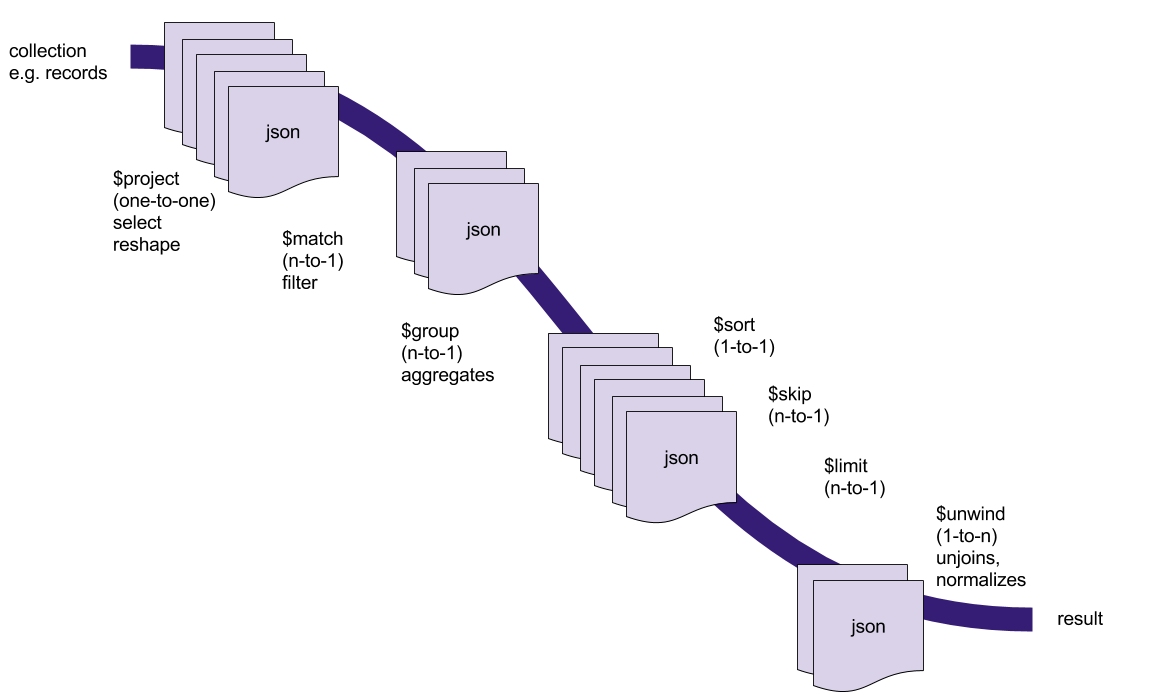

In [45]:
from IPython.display import Image
Image(filename='images/mongodb_pipeline.png', width=600, height=300)

### Removing data    

It's easy (almost too easy) to delete projects, collections, and databases in MongoDB. Before we get rid of anything, let's determine what collections we have in our database:

In [46]:
conn.earthwindfire.list_collection_names()

['records']

Now let's delete our records collection and check again to see what collections are in our database:

In [47]:
conn.earthwindfire.drop_collection("records")
conn.earthwindfire.list_collection_names()

[]

We can also just drop a database. First let's determine what databases we have:

In [48]:
conn.list_database_names()

['admin', 'config', 'local', 'mydb']

Note that the 'earthwindfire' database is no longer listed.


## Miscellaneous

### Statistics    

The [`dbstats`](https://docs.mongodb.org/manual/reference/method/db.stats/) method returns statistics that reflect the use state of a single database:

In [49]:
db = conn.mydb
collection = db.my_collection
db.command({'dbstats': 1})

{'db': 'mydb',
 'collections': 1,
 'views': 0,
 'objects': 3,
 'avgObjSize': 121.0,
 'dataSize': 363.0,
 'storageSize': 4096.0,
 'numExtents': 0,
 'indexes': 1,
 'indexSize': 4096.0,
 'scaleFactor': 1.0,
 'fsUsedSize': 91175235584.0,
 'fsTotalSize': 125760958464.0,
 'ok': 1.0}

[`collStats`](https://docs.mongodb.org/manual/reference/command/collStats/) returns a variety of storage statistics for a given collection. Let's try it out for our NOAA records collection:

In [50]:
db.command({'collstats': 'my_collection', 'verbose': 'true' })

{'ns': 'mydb.my_collection',
 'size': 363,
 'count': 3,
 'avgObjSize': 121,
 'storageSize': 4096,
 'capped': False,
 'wiredTiger': {'metadata': {'formatVersion': 1},
  'creationString': 'access_pattern_hint=none,allocation_size=4KB,app_metadata=(formatVersion=1),assert=(commit_timestamp=none,durable_timestamp=none,read_timestamp=none),block_allocation=best,block_compressor=snappy,cache_resident=false,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=false,extractor=,format=btree,huffman_key=,huffman_value=,ignore_in_memory_cache_size=false,immutable=false,internal_item_max=0,internal_key_max=0,internal_key_truncate=true,internal_page_max=4KB,key_format=q,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=32KB,leaf_value_max=64MB,log=(enabled=true),lsm=(auto_throttle=true,bloom=true,bloom_bit_count=16,bloom_config=,bloom_hash_count=8,bloom_oldest=false,chunk_count_limit=0,chunk_max=5GB,chunk_size=10MB,merge_custom=(prefix=,start_generation=0

## Drop database

We can drop or delete a populated database as well:

In [51]:
# See list of databases:
conn.list_database_names()

['admin', 'config', 'local', 'mydb']

In [52]:
# Drop the 'mydb' database created earlier.
conn.drop_database("mydb")
conn.list_database_names()

['admin', 'config', 'local']

Nice work!